In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import matplotlib
%matplotlib inline

Using TensorFlow backend.


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_curve, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import Model
import sys

In [3]:
sys.path.append('../')

In [4]:
df = pd.read_csv('/home/fdz/git/concept_drift_exps/data/musk/data/musk_csv.csv')

In [5]:
print(df.shape)
df.head()

(6598, 170)


,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [6]:
df['class'].value_counts() / len(df)

0    0.845862
1    0.154138
Name: class, dtype: float64

In [7]:
features = [col for col in df.columns if col not in ['ID', 'molecule_name', 'conformation_name', 'class']]
target = 'class'

In [8]:
X, y = df[features], df[target]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
scale = True
if scale:
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

/home/fdz/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [11]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(4948, 166) (1650, 166)
(4948,) (1650,)


# Logistic

In [14]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

/home/fdz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
preds_train, preds_test = lg.predict(X_train), lg.predict(X_test)

In [16]:
confusion_matrix(y_train, preds_train)

array([[4109,   66],
       [ 248,  525]])

In [17]:
confusion_matrix(y_test, preds_test)

array([[1379,   27],
       [  77,  167]])

In [18]:
accuracy_score(y_test, preds_test)

0.936969696969697

In [19]:
accuracy_score(y_train, preds_train)

0.9365400161681487

# xg and features importance

In [20]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [21]:
accuracy_score(y_test, xgb.predict(X_test))

0.9672727272727273

In [22]:
imp = xgb.get_booster().get_score(importance_type='total_gain')

In [23]:
import operator
sorted_imp = sorted(imp.items(), key=operator.itemgetter(1), reverse=True)

In [24]:
sorted_imp

[('f162', 1903.5013436899999),
 ('f35', 1827.0245231090005),
 ('f8', 941.39607578),
 ('f0', 887.6879249500003),
 ('f150', 853.5022369900001),
 ('f123', 698.0265757999999),
 ('f65', 440.8089481),
 ('f91', 438.07288841999997),
 ('f121', 425.4867119),
 ('f131', 397.841342737),
 ('f54', 374.67356573),
 ('f125', 362.5749746888),
 ('f143', 331.38507872),
 ('f62', 266.02938086),
 ('f110', 261.58716002),
 ('f164', 258.8096447519),
 ('f32', 248.898399),
 ('f139', 234.10876379),
 ('f161', 210.01037698),
 ('f30', 200.30146834),
 ('f82', 196.17567207999994),
 ('f109', 184.45895875000002),
 ('f147', 178.01268391999994),
 ('f20', 175.0697174),
 ('f101', 169.75267659000002),
 ('f67', 169.13474802000002),
 ('f104', 167.49587915),
 ('f3', 161.36243437),
 ('f90', 158.04885579000003),
 ('f58', 154.66962813),
 ('f25', 148.83152011),
 ('f108', 148.69111442),
 ('f34', 148.4653626),
 ('f66', 147.87710658000003),
 ('f128', 128.22477433),
 ('f116', 126.98332022440002),
 ('f87', 124.73145015),
 ('f159', 123.033

In [25]:
tr = int(0.25 * len(sorted_imp))
tr

27

In [26]:
top_25 = [t[0] for t in sorted_imp[:tr]]

In [27]:
bottom_25 = [t[0] for t in sorted_imp[-tr:]]

# NN

In [28]:
X.shape

(6598, 166)

In [29]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [30]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(4948, 166) (1650, 166)
(4948, 2) (1650, 2)


In [31]:
def model():
    
    x_in = tf.keras.layers.Input(shape=(166, ))
    x = tf.keras.layers.Dense(200, activation='relu')(x_in)
    #x = tf.keras.layers.Dense(50, activation='relu')(x_in)
    out = tf.keras.layers.Dense(2, activation='softmax')(x)
    clf = tf.keras.models.Model(x_in, out)
    clf.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    
    clf.summary()
    return clf

In [32]:
clf = model()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 166)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               33400     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 402       
Total params: 33,802
Trainable params: 33,802
Non-trainable params: 0
_________________________________________________________________


In [33]:
clf.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Train on 4948 samples, validate on 1650 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
4948/4948 [==============================] - 0s 55us/sample - loss: 0.3501 - acc: 0.8545 - val_loss: 0.2516 - val_acc: 0.9164
Epoch 2/100
4948/4948 [==============================] - 0s 35us/sample - loss: 0.2299 - acc: 0.9177 - val_loss: 0.2003 - val_acc: 0.9309
Epoch 3/100
4948/4948 [==============================] - 0s 34us/sample - loss: 0.1991 - acc: 0.9234 - val_loss: 0.1808 - val_acc: 0.9339
Epoch 4/100
4948/4948 [==============================] - 0s 39us/sample - loss: 0.1822 - acc: 0.9297 - val_loss: 0.1740 - val_acc: 0.9321
Epoch 5/100
4948/4948 [==============================] - 0s 37us/sample - loss: 0.1715 - acc: 0.9325 - val_loss: 0.1546 - val_acc: 0.9412
Epoch 6/100
4948/4948 [==============================] - 0s 35us/sample - loss: 0.1594 - acc: 0.9394 - val_loss: 0.1467 - val_acc: 0.9467
Epoch 7/100
4948/4948 [==============================] - 0s 38us/sample - lo

Epoch 58/100
4948/4948 [==============================] - 0s 37us/sample - loss: 0.0109 - acc: 0.9982 - val_loss: 0.0215 - val_acc: 0.9903
Epoch 59/100
4948/4948 [==============================] - 0s 37us/sample - loss: 0.0104 - acc: 0.9986 - val_loss: 0.0188 - val_acc: 0.9945
Epoch 60/100
4948/4948 [==============================] - 0s 33us/sample - loss: 0.0112 - acc: 0.9974 - val_loss: 0.0191 - val_acc: 0.9921
Epoch 61/100
4948/4948 [==============================] - 0s 37us/sample - loss: 0.0104 - acc: 0.9978 - val_loss: 0.0208 - val_acc: 0.9921
Epoch 62/100
4948/4948 [==============================] - 0s 35us/sample - loss: 0.0223 - acc: 0.9917 - val_loss: 0.0302 - val_acc: 0.9873
Epoch 63/100
4948/4948 [==============================] - 0s 37us/sample - loss: 0.0139 - acc: 0.9956 - val_loss: 0.0403 - val_acc: 0.9848
Epoch 64/100
4948/4948 [==============================] - 0s 35us/sample - loss: 0.0076 - acc: 0.9990 - val_loss: 0.0196 - val_acc: 0.9927
Epoch 65/100
4948/4948 [===

In [34]:
preds_train = clf.predict(X_train)
preds_test = clf.predict(X_test)

In [35]:
accuracy_score(np.argmax(y_train, axis=1), np.argmax(preds_train, axis=1))

0.9838318512530315

In [36]:
accuracy_score(np.argmax(y_test, axis=1), np.argmax(preds_test, axis=1))

0.9745454545454545

# features permutation

In [37]:
idxs_top_25 = [int(f[1:]) for f in top_25]

In [38]:
idxs_bottom_25 = [int(f[1:]) for f in bottom_25]

In [39]:
perm_top = np.random.permutation(idxs_top_25)
perm_bot = np.random.permutation(idxs_bottom_25)

In [40]:
X_test_perm_top = X_test.copy()
X_test_perm_bot = X_test.copy()

In [41]:
X_test_perm_top[:, idxs_top_25] = X_test_perm_top[:, perm_top]
X_test_perm_bot[:, idxs_bottom_25] = X_test_perm_bot[:, perm_bot]

In [42]:
accuracy_score(np.argmax(y_test, axis=1), np.argmax(clf.predict(X_test_perm_top), axis=1))

0.953939393939394

In [43]:
accuracy_score(np.argmax(y_test, axis=1), np.argmax(clf.predict(X_test_perm_bot), axis=1))

0.8466666666666667

In [44]:
accuracy_score(np.argmax(y_test, axis=1), np.argmax(clf.predict(X_test), axis=1))

0.9745454545454545

# Vae

In [45]:
from importlib import reload

In [47]:
import vae_symmetry_finder as vsf

In [76]:
reload(vsf)

<module 'vae_symmetry_finder' from '../vae_symmetry_finder.py'>

In [77]:
X_train.shape

(4948, 166)

In [78]:
vae = vsf.VaeSymmetryFinder(clf, input_shape=(166,), output_shape=(2, ), intermediate_dim=500)

Vae
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 166)          0                                            
__________________________________________________________________________________________________
reshape_4 (Reshape)             (None, 166)          0           encoder_input[0][0]              
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 500)          83500       reshape_4[0][0]                  
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 2)            1002        dense_14[0][0]                   
__________________________________________________________________________________________________
z_log_

In [80]:
vae.fit(X_train, x_test=X_test, epochs=200)

Train on 4948 samples, validate on 1650 samples
Epoch 1/200
4948/4948 [==============================] - 0s 39us/sample - loss: 0.1212 - val_loss: 0.0902
Epoch 2/200
4948/4948 [==============================] - 0s 42us/sample - loss: 0.0920 - val_loss: 0.1020
Epoch 3/200
4948/4948 [==============================] - 0s 44us/sample - loss: 0.0974 - val_loss: 0.0861
Epoch 4/200
4948/4948 [==============================] - 0s 42us/sample - loss: 0.0791 - val_loss: 0.0726
Epoch 5/200
4948/4948 [==============================] - 0s 42us/sample - loss: 0.0669 - val_loss: 0.0794
Epoch 6/200
4948/4948 [==============================] - 0s 42us/sample - loss: 0.0630 - val_loss: 0.0584
Epoch 7/200
4948/4948 [==============================] - 0s 43us/sample - loss: 0.0611 - val_loss: 0.0475
Epoch 8/200
4948/4948 [==============================] - 0s 42us/sample - loss: 0.0592 - val_loss: 0.0484
Epoch 9/200
4948/4948 [==============================] - 0s 43us/sample - loss: 0.0505 - val_loss: 0.062

4948/4948 [==============================] - 0s 48us/sample - loss: 0.0035 - val_loss: 0.0111
Epoch 78/200
4948/4948 [==============================] - 0s 48us/sample - loss: 0.0054 - val_loss: 0.0097
Epoch 79/200
4948/4948 [==============================] - 0s 72us/sample - loss: 0.0045 - val_loss: 0.0093
Epoch 80/200
4948/4948 [==============================] - 0s 46us/sample - loss: 0.0024 - val_loss: 0.0074
Epoch 81/200
4948/4948 [==============================] - 0s 57us/sample - loss: 0.0019 - val_loss: 0.0149
Epoch 82/200
4948/4948 [==============================] - 0s 50us/sample - loss: 0.0034 - val_loss: 0.0075
Epoch 83/200
4948/4948 [==============================] - 0s 48us/sample - loss: 0.0033 - val_loss: 0.0094
Epoch 84/200
4948/4948 [==============================] - 0s 54us/sample - loss: 0.0024 - val_loss: 0.0060
Epoch 85/200
4948/4948 [==============================] - 0s 60us/sample - loss: 0.0026 - val_loss: 0.0064
Epoch 86/200
4948/4948 [==========================

4948/4948 [==============================] - 0s 58us/sample - loss: 0.0251 - val_loss: 0.0233
Epoch 154/200
4948/4948 [==============================] - 0s 68us/sample - loss: 0.0107 - val_loss: 0.0265
Epoch 155/200
4948/4948 [==============================] - 0s 64us/sample - loss: 0.0065 - val_loss: 0.0147
Epoch 156/200
4948/4948 [==============================] - 0s 56us/sample - loss: 0.0096 - val_loss: 0.0709
Epoch 157/200
4948/4948 [==============================] - 0s 70us/sample - loss: 0.0251 - val_loss: 0.0290
Epoch 158/200
4948/4948 [==============================] - 0s 76us/sample - loss: 0.0130 - val_loss: 0.0331
Epoch 159/200
4948/4948 [==============================] - 0s 54us/sample - loss: 0.0157 - val_loss: 0.0273
Epoch 160/200
4948/4948 [==============================] - 0s 54us/sample - loss: 0.0047 - val_loss: 0.0083
Epoch 161/200
4948/4948 [==============================] - 0s 55us/sample - loss: 0.0028 - val_loss: 0.0081
Epoch 162/200
4948/4948 [=================

In [65]:
from scipy.stats import entropy

In [84]:
mean_test = []
std_test = []
accs_test = []
for i in range(0, len(X_test), 15):
    rnd_idxs  = np.random.choice(range(len(X_test_perm_bot)), i)
    x_cont = X_test_perm_bot[rnd_idxs]
    y_cont = y_test[rnd_idxs]
    print('Number of contaminations: {} '.format(i))
    x_test_cont = np.concatenate((X_test, x_cont), axis=0)
    y_test_cont = np.concatenate((y_test, y_cont), axis=0)
    
    vae_outs_test = vae.vae.predict(x_test_cont)
    symm_samples_test = vae_outs_test[0]
    orig_preds_test = vae_outs_test[1]
    trans_preds_test = vae_outs_test[2]
    
    kl_test = entropy(orig_preds_test.T, trans_preds_test.T)
    mean_test.append(kl_test.mean())
    std_test.append(kl_test.std())
    preds_test = np.argmax(orig_preds_test, axis=1)
    accs_test.append(accuracy_score(preds_test, np.argmax(y_test_cont, axis=1)))

Number of contaminations: 0 
Number of contaminations: 15 
Number of contaminations: 30 
Number of contaminations: 45 
Number of contaminations: 60 
Number of contaminations: 75 
Number of contaminations: 90 
Number of contaminations: 105 
Number of contaminations: 120 
Number of contaminations: 135 
Number of contaminations: 150 
Number of contaminations: 165 
Number of contaminations: 180 
Number of contaminations: 195 
Number of contaminations: 210 
Number of contaminations: 225 
Number of contaminations: 240 
Number of contaminations: 255 
Number of contaminations: 270 
Number of contaminations: 285 
Number of contaminations: 300 
Number of contaminations: 315 
Number of contaminations: 330 
Number of contaminations: 345 
Number of contaminations: 360 
Number of contaminations: 375 
Number of contaminations: 390 
Number of contaminations: 405 
Number of contaminations: 420 
Number of contaminations: 435 
Number of contaminations: 450 
Number of contaminations: 465 
Number of contam

In [85]:
df = pd.DataFrame()
df['accuracy'] = accs_test
df['entropy_mean'] = mean_test
df['entropy_std'] = std_test

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6e3bf6ced0>,
      dtype=object)

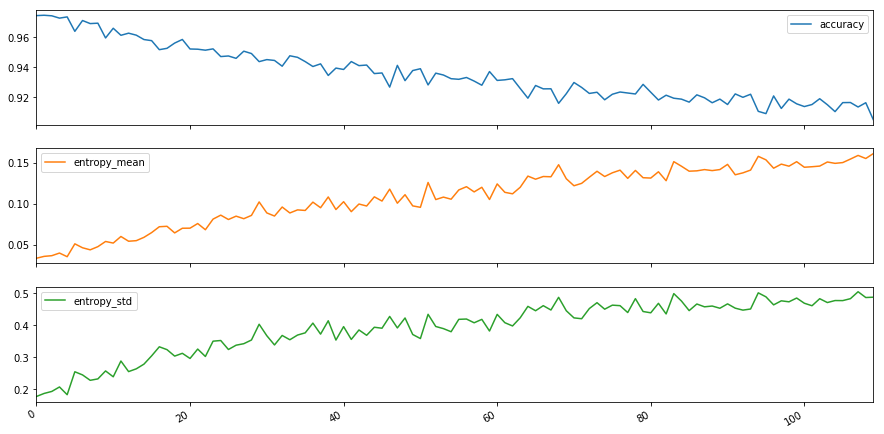

In [86]:
df.plot(logy = False,subplots=True, figsize = (15, 8))